In [336]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio


In [ ]:
def empirical_frequency(A, n_actions): #empirical frequency of actions
    length = len(A)
    freq = np.zeros((length, n_actions), dtype=float)
    count = np.zeros(n_actions, dtype=int)
    
    for t in range(length):
        action = A[t]
        count[action] += 1 # count of each action
        freq[t] = count / (t + 1)  # frequency of each action
    
    return freq


In [338]:
def best_response(payoffs): 
    max_val = np.max(payoffs) # find the max payoff
    best_actions = np.flatnonzero(np.isclose(payoffs, max_val)) # find the index of the max payoff
    return np.random.choice(best_actions) # randomly choose one of the best actions

def cournot(M1, M2, a1, a2, N):
    A1 = np.zeros(N, dtype=int) # player 1's actions
    A2 = np.zeros(N, dtype=int) # player 2's actions

    A1[0] = a1
    A2[0] = a2

    for t in range(1, N):
        p1_payoffs = M1[:, A2[t-1]]   # player 1's payoffs
        A1[t] = best_response(p1_payoffs) # player 1's best response

        p2_payoffs = M2[A1[t-1], :]   # player 2's payoffs
        A2[t] = best_response(p2_payoffs) # player 2's best response

    return A1, A2


In [339]:
q1 = scio.loadmat('cournot_files\q1.mat')
q2 = scio.loadmat('cournot_files\q2.mat')
q3 = scio.loadmat('cournot_files\q3.mat')
q4 = scio.loadmat('cournot_files\q4.mat')


In [340]:
def show(q1):
    M1 = q1['M1']
    M2 = q1['M2']
    a1 = q1['a1'].item()-1
    a2 = q1['a2'].item()-1
    N = q1['n'].item()
    print('M1:\n', np.round(M1, 2))
    print('M2:\n', np.round(M2, 2))
    print('a1:', a1)
    print('a2:', a2)

    A1, A2 = cournot(M1, M2, a1, a2, N)
    freq1 = empirical_frequency(A1, M1.shape[0])
    freq2 = empirical_frequency(A2, M2.shape[1])
    

    plt.figure()
    for i in range(M1.shape[0]):
        plt.plot(freq1[:, i], label=f'P1 action {i+1} : {freq1[-1, i]:.2f}')
    for j in range(M2.shape[1]):
        plt.plot(freq2[:, j], label=f'P2 action {j+1} : {freq2[-1, j]:.2f}')

    plt.title('Empirical frequencies of actions over time')
    plt.xlabel('Time step')
    plt.ylabel('Empirical frequency')
    plt.legend(ncol=2)



M1:
 [[0 6]
 [1 4]]
M2:
 [[0 1]
 [6 4]]
a1: 0
a2: 0


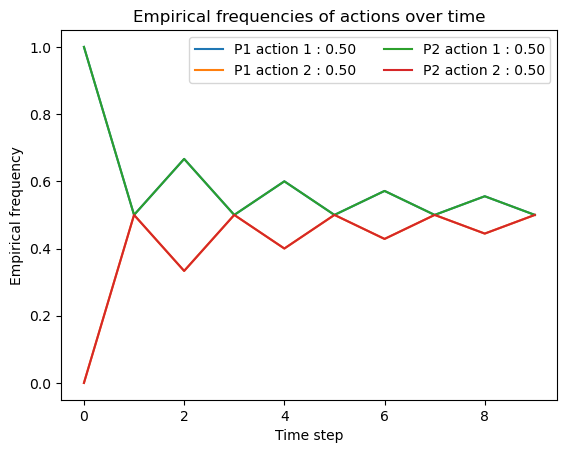

In [341]:
show(q1)

It seems to converge to P1: (0.5, 0.5) and P2: (0.5, 0.5).  
It can be verified that the mixed Nash equilibrium is P1: (2/3, 1/3) and P2: (2/3, 1/3).

M1:
 [[0 6]
 [1 4]]
M2:
 [[0 1]
 [6 4]]
a1: 0
a2: 1


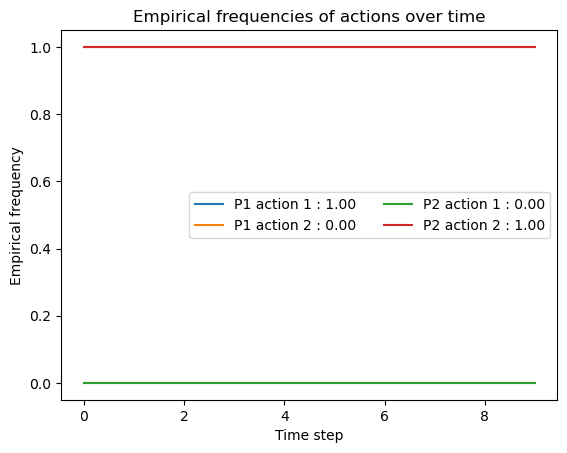

In [342]:
show(q2)

It converges to (P1, P2) = (1, 2), a pure Nash equilibrium.  
It can be verified that the pure Nash equilibria are (P1, P2) = (2, 1) or (1,2).

M1:
 [[0.81 0.16 0.66 0.71 0.44 0.28 0.75 0.84]
 [0.91 0.97 0.04 0.03 0.38 0.68 0.26 0.25]
 [0.13 0.96 0.85 0.28 0.77 0.66 0.51 0.81]
 [0.91 0.49 0.93 0.05 0.8  0.16 0.7  0.24]
 [0.63 0.8  0.68 0.1  0.19 0.12 0.89 0.93]
 [0.1  0.14 0.76 0.82 0.49 0.5  0.96 0.35]
 [0.28 0.42 0.74 0.69 0.45 0.96 0.55 0.2 ]
 [0.55 0.92 0.39 0.32 0.65 0.34 0.14 0.25]
 [0.96 0.79 0.66 0.95 0.71 0.59 0.15 0.62]
 [0.96 0.96 0.17 0.03 0.75 0.22 0.26 0.47]]
M2:
 [[0.81 0.16 0.66 0.71 0.44 0.28 0.75 0.84]
 [0.91 0.97 0.04 0.03 0.38 0.68 0.26 0.25]
 [0.13 0.96 0.85 0.28 0.77 0.66 0.51 0.81]
 [0.91 0.49 0.93 0.05 0.8  0.16 0.7  0.24]
 [0.63 0.8  0.68 0.1  0.19 0.12 0.89 0.93]
 [0.1  0.14 0.76 0.82 0.49 0.5  0.96 0.35]
 [0.28 0.42 0.74 0.69 0.45 0.96 0.55 0.2 ]
 [0.55 0.92 0.39 0.32 0.65 0.34 0.14 0.25]
 [0.96 0.79 0.66 0.95 0.71 0.59 0.15 0.62]
 [0.96 0.96 0.17 0.03 0.75 0.22 0.26 0.47]]
a1: 0
a2: 0


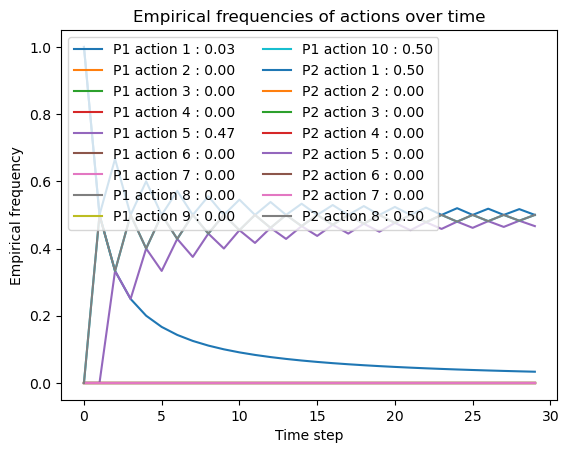

In [343]:
show(q3)

It converges to P1: a5=0.5, a10=0.5, else=0, and P2: a1=0.5, a8=0.5, else=0.    

M1:
 [[0.35 0.08 0.16 0.45 0.11 0.43 0.85 0.42]
 [0.83 0.05 0.79 0.08 0.96 0.91 0.62 0.05]
 [0.59 0.53 0.31 0.23 0.   0.18 0.35 0.9 ]
 [0.55 0.78 0.53 0.91 0.77 0.26 0.51 0.94]
 [0.92 0.93 0.17 0.15 0.82 0.15 0.4  0.49]
 [0.29 0.13 0.6  0.83 0.87 0.14 0.08 0.49]
 [0.76 0.57 0.26 0.54 0.08 0.87 0.24 0.34]
 [0.75 0.47 0.65 1.   0.4  0.58 0.12 0.9 ]
 [0.38 0.01 0.69 0.08 0.26 0.55 0.18 0.37]
 [0.57 0.34 0.75 0.44 0.8  0.14 0.24 0.11]]
M2:
 [[0.78 0.23 0.55 0.93 0.64 0.21 0.31 0.59]
 [0.39 0.35 0.3  0.78 0.38 0.3  0.92 0.26]
 [0.24 0.82 0.74 0.49 0.81 0.47 0.43 0.6 ]
 [0.4  0.02 0.19 0.44 0.53 0.23 0.18 0.71]
 [0.1  0.04 0.69 0.45 0.35 0.84 0.9  0.22]
 [0.13 0.17 0.18 0.31 0.94 0.19 0.98 0.12]
 [0.94 0.65 0.37 0.51 0.88 0.23 0.44 0.3 ]
 [0.96 0.73 0.63 0.51 0.55 0.17 0.11 0.32]
 [0.58 0.65 0.78 0.82 0.62 0.23 0.26 0.42]
 [0.06 0.45 0.08 0.79 0.59 0.44 0.41 0.51]]
a1: 0
a2: 0


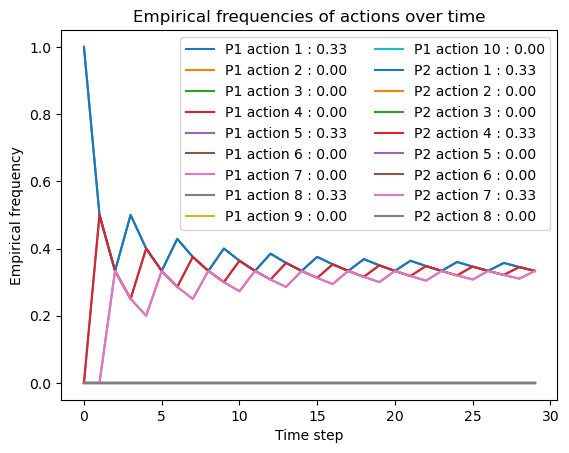

In [344]:
show(q4)

It converges to P1: a=0.33, a5=0.33, a8=0.33, else=0, and P2: a1=0.3, a5=0.3, a7=0.33, else=0.    

All the games converge.  
I think convergence and the result are determined by the initial options.